In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
foot = pd.read_csv("F:/events.csv")

In [3]:
foot.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [4]:
foot.shape

(941009, 22)

In [6]:
foot['event_team'].value_counts().head(5)

Juventus       12054
Fiorentina     11802
Real Madrid    11644
AC Milan       11633
AS Roma        11482
Name: event_team, dtype: int64

In [8]:
foot['opponent'].value_counts().head(5)

Genoa            11981
Chievo Verona    11782
Atalanta         11682
Espanyol         11195
Udinese          11124
Name: opponent, dtype: int64

It seems to be clear that Genoa has clearly been on the receiving end of events 

This are the top teams with the most number of events occurring. 

In [7]:
foot['player'].value_counts().head(5)

cristiano ronaldo     1872
zlatan ibrahimovic    1500
lionel messi          1468
robert lewandowski    1400
stefan kiessling      1296
Name: player, dtype: int64

We can see that Cristiano Ronaldo tops the chart of the players with the most number of events followed by Zlatan and Leo Messi

In [9]:
foot['player2'].value_counts().head(5)

gonzalo castro    641
dimitri payet     626
juanfran          608
mesut ozil        568
lionel messi      522
Name: player2, dtype: int64

Gonzalo Castro has been a victim to most of these events 

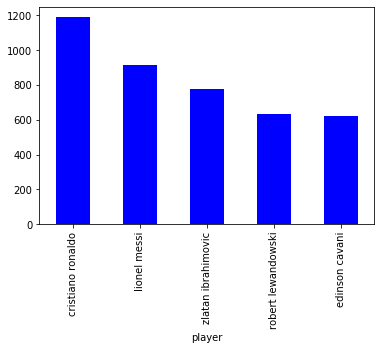

In [34]:
foot[foot['event_type'] == 1].groupby(['player'])['event_type'].count().sort_values(ascending = False).head().plot(kind = 'bar', color = 'b')
plt.show()

So we can clearly see that the attacking play in forward areas of the pitch, be it either an Attempt made, or an attempt blocked or a Goal, the following five player were heavily involved 

In [31]:
foot[foot['event_type'] == 3].groupby(['player'])['event_type'].count().sort_values(ascending = False).head()

player
perparim hetemaj    396
gabi                357
stefan kiessling    309
maxime gonalons     308
pape diop           308
Name: event_type, dtype: int64

We can get the idea here that Perparim Hetemaj has been responsible for the most number of fouls.

In [32]:
foot[foot['event_type'] == 8].groupby(['player'])['event_type'].count().sort_values(ascending = False).head()

player
perparim hetemaj       506
carlos vela            478
stefan kiessling       440
alessandro diamanti    437
eden hazard            435
Name: event_type, dtype: int64

Perparim Hetemaj has also been fould the most number of times over the course of every season

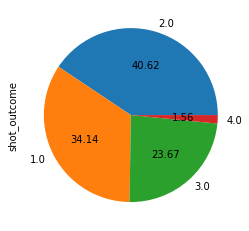

In [39]:
foot['shot_outcome'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.show()

We can accurately get the insight that we had 78014 goals scored, 92827 attempts made, 54082 attempts blocked and 3575
shots blocked on goal.

In [55]:
print("The percentage of goals scored to the number of attempts made is  :")
round(foot[foot['shot_outcome'] == 1].count().head(1)/foot['shot_outcome'].count()*100,1)

The percentage of goals scored to the number of attempts made is  :


id_odsp    34.1
dtype: float64

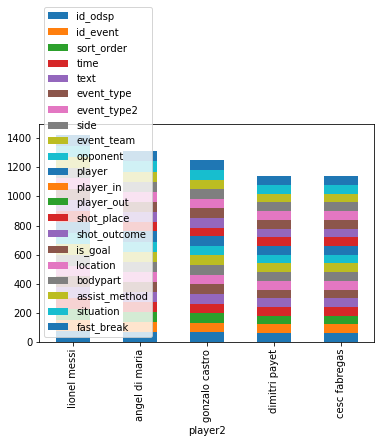

In [57]:
Top_assist = foot[(foot['is_goal'] == 1) &
         (foot['player2'] != np.nan)].groupby('player2').count().sort_values('id_event',
                                                                   ascending=False)[:5].plot(kind = 'bar', stacked = True)
Top_assist

We can clearly see Leo Messi has been the top assist creator for a number of years now followed by his compatriot Angel Di Maria and Gonzalo Castro. 

In [74]:
## Grouping players who had their shots blocked
Players_shot_blocked = foot[foot['shot_outcome'] == 3].groupby('player').count().sort_values('id_event',
                                                                                                  ascending=False)
## Grouping players who have blocked the most shots
Players_shot_blocked = foot[foot['shot_outcome'] == 3].groupby('player2').count().sort_values('id_event',
                                                                                                            ascending=False)


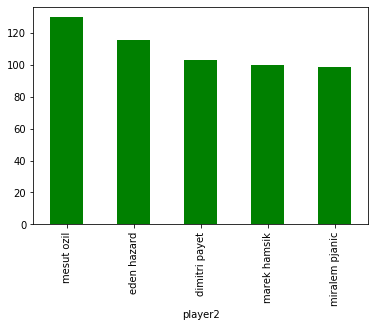

In [75]:
Players_shot_blocked['id_odsp'].head().plot(kind = 'bar', color = 'g')
plt.show()

Here we get an idea of the players whose shots were blocked the most, a list topped by Arsenal's Mesut Ozil